In [17]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import cv2
import time
from imutils.video import WebcamVideoStream
import numpy as np
import mediapipe as mp
from exfunc import *
from rep_counter import *
import custom_drawing_utils
import custom_pose
import matplotlib.pyplot as plt

# Setting initial reps and flag to 0
reps = {}
reps['count'] = 0
reps['flag'] = -1
reps['time'] = {}

mp_drawing = custom_drawing_utils   #Using our own custom version of the drawing functions file
mp_pose = custom_pose

# For webcam input:
cap = WebcamVideoStream(src=1).start()

upper = True

In [2]:
with mp_pose.Pose(
    static_image_mode=False,
    upper_body_only=upper,
    smooth_landmarks=True,
    min_detection_confidence=0.9,
    min_tracking_confidence=0.9) as pose:
  
  stats = cv2.imread("white2.jpg") 

  while True:
    start = time.time()
    image = cap.read()
    # stats = cv2.imread("white2.jpg") 
    
    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

    # Display reps at down left corner
    cv2.putText(image, f"Reps: {reps['count']}", (10, 460), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #Creating a uper_body_only yes/no state

    #Creating a list of dictionaries of the keypoints (x,y,z,visibility)
    if results.pose_landmarks:

      keypoints = []
      for data_point in results.pose_landmarks.landmark:
        keypoints.append({
          "X": data_point.x,
          "Y": data_point.y,
          "Z": data_point.z,
          "Visibility": data_point.visibility,
        })
      image, stats, reps= bicep_curl(image, keypoints, "right", reps)

    else:
      image = cv2.putText(image, "Upper body not visible", (5,20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,255), 2, cv2.LINE_AA)
    if upper==False:  
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    elif upper==True:
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.BICEP_RIGHT)
    
    end = time.time()
    if stats is not None:
      cv2.imshow("Stats", stats)
    image = cv2.putText(image, str(round((1/(end-start)),2)), (565,25), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255,0), 2, cv2.LINE_AA)
    cv2.imshow('FitPose', image)
    if cv2.waitKey(5) & 0xFF == 27:
      break
    


In [3]:
reps = {}
reps = {'count': 12, 'flag': 1, 'time': {1: 1617640604.6396322, 2: 1617640607.7141974, 3: 1617640610.3547294, 4: 1617640612.839824, 5: 1617640615.3746011, 6: 1617640617.78152, 7: 1617640620.1342242, 8: 1617640622.3968952, 9: 1617640624.6584275, 10: 1617640629.3127303, 11: 1617640631.522148, 12: 1617640633.947622}}

In [4]:
rep_time2 = reps['time']
reps['time'] = rep_time2

In [4]:
for i in range(1, reps['count']):
    reps['time'][i] = reps['time'][i+1] - reps['time'][i]
    print(i, reps['time'][i])

1 3.0745651721954346
2 2.6405320167541504
3 2.4850945472717285
4 2.5347771644592285
5 2.40691876411438
6 2.3527042865753174
7 2.2626709938049316
8 2.2615323066711426
9 4.6543028354644775
10 2.2094175815582275
11 2.425474166870117


In [5]:
x = range(1, reps['count'])
y = list(reps['time'].values())[:reps['count']-1]

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

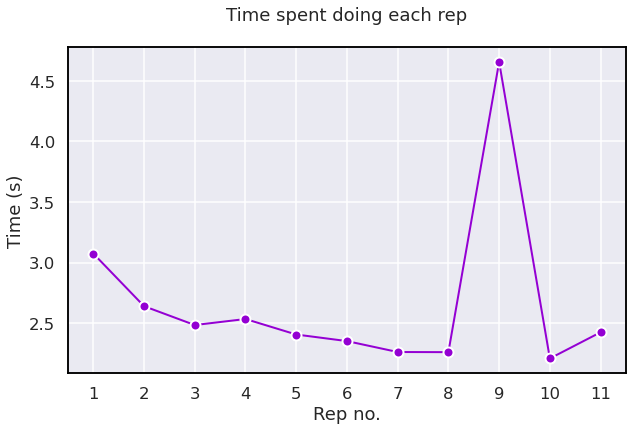

In [72]:
figure = plt.figure(figsize=(10, 6))

sns.set_style('darkgrid', {'axes.edgecolor': 'black'})
sns.set_context('talk')
sns.lineplot(x, y, color='darkviolet', lw=2,
            marker='o', ms=10, mec='white', mew=2)

# plt.fill_between(x, y,)
plt.xticks(x)
plt.xlabel('Rep no.')
plt.ylabel('Time (s)')
plt.title("Time spent doing each rep\n")

plt.show();